NAME - VARUN MISHRA

SCHOLAR NO- 24215011102

Q- Soil Type Classification Using PSA Data

   Spectral_Ratio_1  Spectral_Ratio_2  Spectral_Ratio_3  Spectral_Ratio_4  \
0          0.553641          0.662444          1.116646          0.647838   
1          0.965029          1.064251          0.707014          1.048081   
2          1.280396          1.110978          0.664802          0.987553   
3          0.722046          0.839937          0.545676          1.164610   
4          1.189775          0.627139          0.319277          0.706878   

   Spectral_Ratio_5  Spectral_Ratio_6  Spectral_Ratio_7  Spectral_Ratio_8  \
0          1.333790          0.978664          1.025678          0.916488   
1          0.872850          0.770317          1.220232          0.538688   
2          1.291147          0.622521          1.190966          1.696783   
3          0.975246          0.488438          0.749551          1.100980   
4          0.927200          1.774088          1.162977          0.457723   

   Spectral_Ratio_9  Spectral_Ratio_10  ...  Spectral_Ratio_994  \
0      

<ipython-input-1-deb0c96f6823>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Soil_Type", palette="viridis")


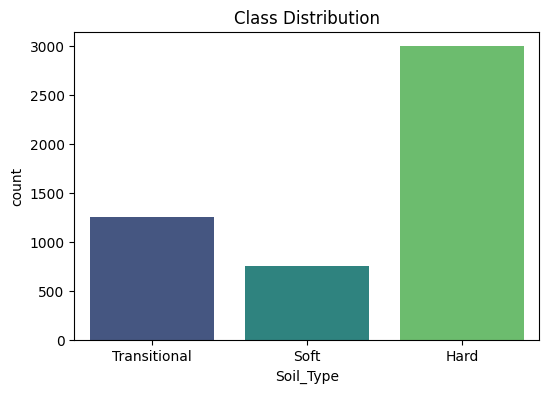

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4711 - loss: 1.2141 - val_accuracy: 0.6000 - val_loss: 0.9704
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5946 - loss: 0.9538 - val_accuracy: 0.6000 - val_loss: 0.9641
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5838 - loss: 0.9504 - val_accuracy: 0.6000 - val_loss: 0.9686
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6112 - loss: 0.9296 - val_accuracy: 0.6000 - val_loss: 0.9680
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5957 - loss: 0.9321 - val_accuracy: 0.6000 - val_loss: 0.9604
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6055 - loss: 0.9059 - val_accuracy: 0.6000 - val_loss: 0.9694
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5894 - loss: 0.9160 - val_accuracy: 0.6000 - val_loss: 0.9682
Epoch 8/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5978 - loss: 0.8869 - val_accuracy: 0.

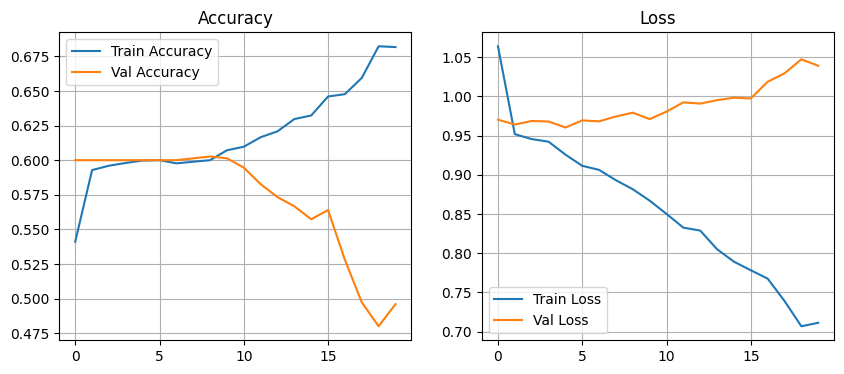

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Classification Report:
              precision    recall  f1-score   support

        Hard       0.59      0.75      0.66       450
        Soft       0.12      0.08      0.10       113
Transitional       0.19      0.11      0.14       187

    accuracy                           0.49       750
   macro avg       0.30      0.31      0.30       750
weighted avg       0.42      0.49      0.45       750


Confusion Matrix:


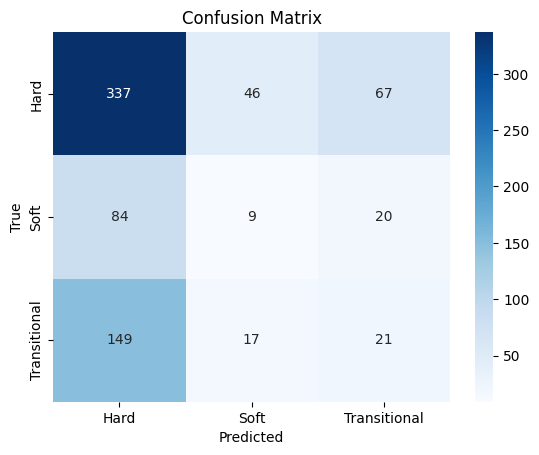

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Task A: Generate Synthetic Data
def generate_synthetic_psa_data(num_samples=5000, num_features=20):
    np.random.seed(42)
    magnitudes = np.random.uniform(3.0, 8.0, num_samples)         # Earthquake magnitude
    depths = np.random.uniform(5, 100, num_samples)               # Earthquake depth in km
    spectral_ratios = np.random.normal(1.0, 0.3, (num_samples, num_features)) # Simulated spectral ratio data
    soil_classes = np.random.choice(["Hard", "Transitional", "Soft"], num_samples, p=[0.6, 0.25, 0.15]) # Class imbalance

    # Combine into a DataFrame
    data = pd.DataFrame(spectral_ratios, columns=[f"Spectral_Ratio_{i+1}" for i in range(num_features)])
    data["Magnitude"] = magnitudes
    data["Depth"] = depths
    data["Soil_Type"] = soil_classes
    return data

# Generate the synthetic dataset
num_features = 1000  # High-dimensional data for full SR
df = generate_synthetic_psa_data(num_features=num_features)
print(df.head())

# Task A: Data Exploration and Preprocessing
# EDA
print(df.describe())
print(df["Soil_Type"].value_counts())

# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Soil_Type", palette="viridis")
plt.title("Class Distribution")
plt.show()

# Data Splitting and Scaling
features = [col for col in df.columns if "Spectral_Ratio" in col] + ["Magnitude", "Depth"]
X = df[features]
y = df["Soil_Type"]

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Optional PCA (to reduce dimensionality)
pca = PCA(n_components=100)  # Reduce to 100 components
X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)

# Convert labels to one-hot encoding for NN
y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

# Task B: Model Architecture & Implementation
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes (Hard, Transitional, Soft)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_oh, validation_data=(X_val, y_val_oh), epochs=20, batch_size=32, verbose=1)

# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")
plt.grid()
plt.show()

# Task C: Evaluation and Interpretation
# Evaluate on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
